In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import ResoFit
from ResoFit.calibration import Calibration
from ResoFit.fitresonance import FitResonance
import numpy as np

In [2]:
# Global parameters
energy_min = 7
energy_max = 150
energy_step = 0.01

In [3]:
_layer_1 = 'Gd'
_thickness_1 = 0.15  # mm
mass = 0.36  # gram
density = 7.68 #mass / (length * width * height * mm3_to_cm3)

folder = 'data'
data_file = 'all_thin.txt'
spectra_file = 'Image002_Spectra.txt'
repeat = 5

In [4]:
source_to_detector_m = 16.  # 16#16.445359069030175#16.447496101100739
offset_us = 0  # 0#2.7120797253959119#2.7355447625559037

Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                    0     -inf      inf        0    False     None     None
source_to_detector_m     16.11     -inf      inf 0.001996     True     None     None


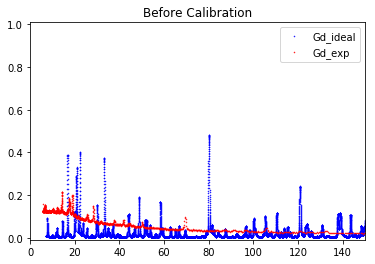

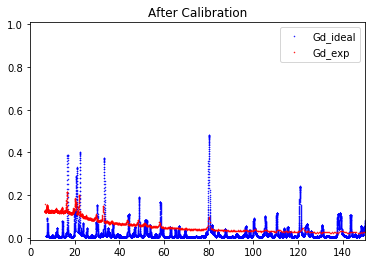

In [5]:
# Calibrate the peak positions
calibration = Calibration(data_file=data_file,
                          spectra_file=spectra_file,
                          layer_1=_layer_1,
                          thickness_1=_thickness_1,
                          density_1=np.NaN,
                          energy_min=energy_min,
                          energy_max=energy_max,
                          energy_step=energy_step,
                          repeat=repeat,
                          folder=folder)

calibrate_result = calibration.calibrate(source_to_detector_m=source_to_detector_m,
                                         offset_us=offset_us,
                                         vary='source_to_detector')
calibration.plot_before()
calibration.plot_after()
# calibration.plot_after_interp()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
density        7.68        0      inf        0    False     None     None
thickness   0.06935        0      inf 0.0009035     True     None     None
Molar conc. of element Gd in layer Gd is: 0.048839427662957076 (mol/cm3)


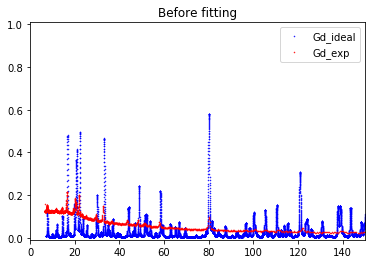

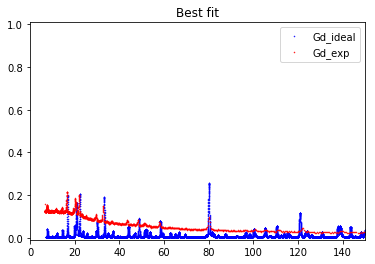

In [6]:
# Fit the peak height
fit = FitResonance(spectra_file=spectra_file, data_file=data_file, repeat=repeat, layer=_layer_1,
                   calibrated_offset_us=calibration.calibrated_offset_us,
                   calibrated_source_to_detector_m=calibration.calibrated_source_to_detector_m,
                   energy_min=energy_min, energy_max=energy_max, energy_step=energy_step)
fit.fit(thickness=_thickness_1, density=density, vary='thickness')
fit.molar_conc(_layer_1)
fit.plot_before()
fit.plot_after()
